In [1]:
import pandas as pd
import os
import pandas as pd
from GrBinaryIPF import GrBinaryIPF
import math
import matplotlib.pyplot as plt
import numpy as np

fpath =  "data/GermanCredit_new.csv"

In [2]:
data = pd.read_csv(fpath)

In [3]:
data.head()

,id,DurationMonth,CreditAmount,score,sex,age35,protected
0,0,0.029412,0.949433,0.600715,1,0,2
1,1,0.647059,0.686310,0.496131,0,1,3
2,2,0.117647,0.898426,0.506866,1,0,2
3,3,0.558824,0.580059,0.599482,1,0,2
4,4,0.294118,0.745791,0.550060,1,0,2


In [4]:
rank = np.argsort(data["score"])

In [5]:
group = data["protected"]

In [6]:
set(group)

{1, 2, 3, 4}

In [7]:
itemList = set(rank)

In [8]:
G1 = []
G2 = []
G3 = []
G4 = []
for i in range(0,len(itemList)):
    if(group[i] == 1):
        G1.append(group[i])
    elif(group[i] == 2):
        G2.append(group[i])
    elif(group[i] == 3):
        G3.append(group[i])
    else:
        G4.append(group[i])

In [9]:
p1 = len(G1)/len(itemList)
p2 = len(G2)/len(itemList)
p3 = len(G3)/len(itemList)
p4 = len(G4)/len(itemList)

In [10]:
A = ['1','2','3','4']

In [11]:
P = {'1':p1,'2':p2,'3':p3,'4':p4}

In [12]:
S={}
for a in A:
   
    scoreList = []
    
    S[a] = scoreList

In [13]:
score = len(rank)
for i in rank:
    if group[i] == 1:
        S[A[0]].append((score,i))
    if group[i] == 2:
        S[A[1]].append((score,i))
    if group[i] == 3:
        S[A[2]].append((score,i))
    else:
        S[A[3]].append((score,i)) 
    score = score - 1

In [14]:
def swap(dict,i,j):
    item = dict[i]
    dict[i] = dict[j]
    dict[j] = item 

In [15]:
def DetConstSort(S,A,P,kmax):
    counts = {}
    minCounts = {}
    for ai in A:
        counts[ai] = 0
        minCounts[ai] = 0
    
    rankedAttList = {}
    rankedScoreList = {}
    maxIndices = {}
    lastEmpty = 0
    k = 0
    
    while lastEmpty <= kmax:
        k = k + 1
        tempMinCounts = {}
        for ai in A:
            tempMinCounts[ai] = math.floor(k * P[ai])
        changedMins = []
        for ai in A:
            if minCounts[ai ] < tempMinCounts[ai]:
                #print(ai,counts[ai])
                changedMins.append((S[ai][counts[ai]],ai))
        if len(changedMins) != 0 :
            changedMins.sort(reverse=True)
            #ordChangedMins = changedMins
        for sai,ai in  changedMins:
            rankedAttList[lastEmpty] = ai
            
            rankedScoreList[lastEmpty] = S[ai][counts[ai]]
            maxIndices[lastEmpty] = k
            start = lastEmpty
            while start > 0 and maxIndices[start - 1] >= start and rankedScoreList[start-1][0] < rankedScoreList[start][0]:
                swap(maxIndices,start - 1,start)
                swap(rankedAttList,start - 1, start)
                swap(rankedScoreList,start - 1, start)
                start = start - 1
            counts[ai] = counts[ai] + 1 
            lastEmpty = lastEmpty + 1
        minCounts = tempMinCounts
    return (rankedAttList, rankedScoreList)

In [16]:
kmax = len(rank) - 1
rankedAttList,rankedScoreList = DetConstSort(S,A,P,kmax)

In [17]:
detOut = []
for key in rankedScoreList.keys():
    detOut.append(rankedScoreList[key][1])

In [18]:
P = {'1':p1,'2':p2,'3':p3,'4':p4}

In [19]:
P

{'1': 0.335, '2': 0.355, '3': 0.213, '4': 0.097}

In [20]:
posCheck = [10,25,50,100,500,1000]

sumFail = 0
count = {'1':0,'2':0,'3':0,'4':0}
x_detConst = []
y = []
A = ['1','2','3','4']
totalViolates = 0
itrCount = 1
for i in detOut:
    itemGrp = group[i]
    count[str(itemGrp)] = count[str(itemGrp)] + 1
    
    violates = False
    for j in A:
        bot = math.floor(itrCount*P[j])
        top = math.ceil(itrCount*P[j])
        #print(j,bot,top)
        if (count[j] > top):
            violates = True
    if violates == True:
        totalViolates = totalViolates + 1
    #print(n,totalViolates)
    itrCount = itrCount + 1
    if itrCount in posCheck:
        x_detConst.append((itrCount-totalViolates)/itrCount*100)
        print('pfairness satisfied by DetConstSort = ',itrCount,(itrCount-totalViolates)/itrCount*100)

pfairness satisfied by DetConstSort =  10 70.0
pfairness satisfied by DetConstSort =  25 28.000000000000004
pfairness satisfied by DetConstSort =  50 14.000000000000002
pfairness satisfied by DetConstSort =  100 7.000000000000001
pfairness satisfied by DetConstSort =  500 1.4000000000000001
pfairness satisfied by DetConstSort =  1000 0.7000000000000001


In [21]:
import pandas as pd
import random
import math

import networkx as nx
import networkx as nx
from networkx.algorithms import bipartite
import random
import math


df = pd.read_csv('data/GermanCredit_new.csv')
numberOfItem = len(rank)

genre = df['protected'][0:numberOfItem]
allGenre = []
allgroup = []
for g in genre:
    if g not in allGenre:
        allGenre.append(g)
    allgroup.append(allGenre.index(g))

movieId  = df['id'][0:numberOfItem]
score =  df['score'][0:numberOfItem]


rankScore = []
movieToId = {}
for i in range(0,len(movieId)):
    rankScore.append((score[i],movieId[i],allgroup[i]))
    movieToId[movieId[i]] = i  

rankScore.sort(reverse=True)



movieIdDic = {}
rank = []
i = 1
group = []
groupDic = {}
for item in rankScore:
    rank.append(i)
    group.append(item[2])
    groupDic[i] = item[2]
    movieIdDic[item[1]+1] = i
    i = i + 1


# rank = rank[0:200]
# group = group[0:200]


numberOfItem = len(rank)

rankGrp = {}
for i in range(0, len(rank)):
    rankGrp[rank[i]] = group[i]

grpCount = {}
for i in group:
    grpCount[i] = 0

rankGrpPos = {}
for i in rank:
    grpCount[rankGrp[i]] = grpCount[rankGrp[i]] + 1
    rankGrpPos[i] = grpCount[rankGrp[i]]

rankRange = {}

delta = 0
for item in rank:
    i = rankGrpPos[item]
    n = numberOfItem
    fp = grpCount[rankGrp[item]]
    # r1 = math.floor((i-1) * n / fp)+1
    # r2 = math.ceil(i * n / fp)

    r1 = math.floor((i - 1 - delta) * n / fp) + 1
    r2 = math.ceil((i + delta) * n / fp)

    if r1 < 0:
        r1 = 0

    if r2 > numberOfItem:
        r2 = numberOfItem
    rankRange[item] = (r1, r2)

B = nx.Graph()
top_nodes = []
bottom_nodes = []

for i in rank:
    top_nodes.append(i)
    bottom_nodes.append(str(i))
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)

for i in rank:
    r1, r2 = rankRange[i]
    # print(r1,r2)
    for j in range(1, numberOfItem + 1):
        if j >= r1 and j <= r2:
            # print(i,j)
            B.add_edge(i, str(j), weight=abs(i - j))

my_matching = nx.algorithms.bipartite.minimum_weight_full_matching(B, top_nodes, "weight")

#print(my_matching)

rank1 = []
rank2 = []
for i in range(0, numberOfItem):
    rank2.append(0)
newRank = []
for i in range(1, numberOfItem + 1):
    # print(my_matching[i])
    newRank.append(int(my_matching[i]))
    rank1.append(i)
    rank2[int(my_matching[i]) - 1] = i

inputRank = []
fairRank = []

for i in range(0, numberOfItem):
    rn1 = rank1[i]
    rn2 = rank2[i]
    inputRank.append(movieIdDic[rn1])
    fairRank.append(movieIdDic[rn2])



In [22]:
P={0:0,1:0,2:0,3:0}
for val in groupDic.values():
    P[val] = P[val] + 1
    
total = sum(P.values())
for key,val in P.items():
    P[key] = P[key]/total

In [23]:
posCheck = [10,25,50,100,500,1000]
#P = {0:p1,1:p2,2:p3,3:p4}

sumFail = 0
count = {0:0,1:0,2:0,3:0}
y_out = []
y = []
A = [0,1,2,3]
totalViolates = 0
itrCount = 1
for i in newRank:
#     q = movieToId[i]
    itemGrp = groupDic[i]
    #print(itemGrp)
    count[itemGrp] = count[itemGrp] + 1
    
    violates = False
    for j in A:
        bot = math.floor(itrCount*P[j])
        top = math.ceil(itrCount*P[j])
        #print(j,bot,top)
        if (count[j] > top):
            violates = True
    #print(n,totalViolates)
    itrCount = itrCount + 1
    if itrCount in posCheck:
        y_out.append((itrCount-totalViolates)/itrCount*100)
        print('n = ',itrCount,'pfairness satisfied by ApproxMultiIPF ',(itrCount-totalViolates)/itrCount*100)

n =  10 pfairness satisfied by ApproxMultiIPF  100.0
n =  25 pfairness satisfied by ApproxMultiIPF  100.0
n =  50 pfairness satisfied by ApproxMultiIPF  100.0
n =  100 pfairness satisfied by ApproxMultiIPF  100.0
n =  500 pfairness satisfied by ApproxMultiIPF  100.0
n =  1000 pfairness satisfied by ApproxMultiIPF  100.0


In [24]:
A

[0, 1, 2, 3]

In [25]:
Rout = []

In [26]:
x_detConst

[70.0,
 28.000000000000004,
 14.000000000000002,
 7.000000000000001,
 1.4000000000000001,
 0.7000000000000001]

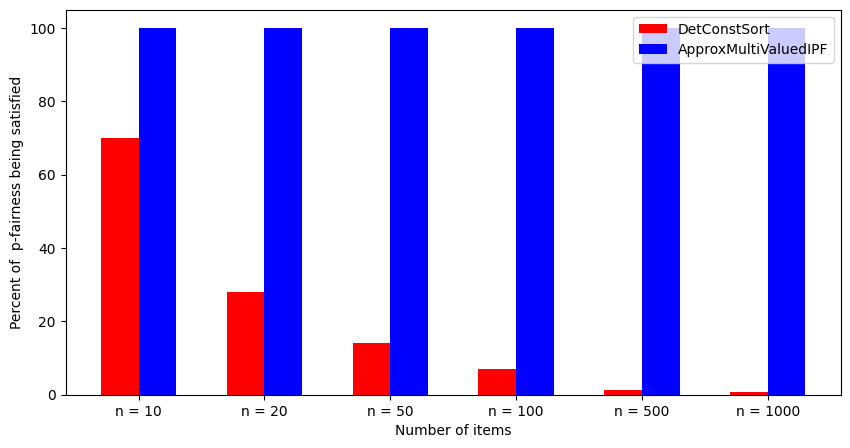

In [28]:
import numpy as np
# Numbers of pairs of bars you want
N = 6

# Data on X-axis
position = [0,1,2,3,4,5]
# Specify the values of blue bars (height)
blue_bar = []
orange_bar = []
for i in position:
    blue_bar.append(x_detConst[i]) 
    orange_bar.append(y_out[i]) 

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='DetConstSort',color = 'red')
plt.bar(ind + width, orange_bar, width, label='ApproxMultiValuedIPF',color = 'blue')

plt.xlabel('Number of items')
plt.ylabel('Percent of  p-fairness being satisfied')
#plt.title('DetConstSort vs GrBinaryIPF ')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('n = 10','n = 20','n = 50','n = 100','n = 500','n = 1000' ))
#plt.yticks([0.20,0.40,0.60,0.80,1.00,1.2],['20','40','60','80','100',''])
# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()